---
# MLlib Spark

## Aprendizado de Máquina no Apache Spark

Alunos:


*   **Alisson Nunes** (725862)
*   **Lucas Mathaeus** (726561)
*   **William Eugênio** (726601)

Bacharelado em Ciência da Computação (BCC)<br>
Departamento de Computação (DC)<br>
Universidade Federal de São Carlos (UFSCar)


# (0) Contextualização

## Aprendizado de Máquina

- .
- .

## Classificação

## Clusterização

In [12]:
#instalando o pacote findspark
import findspark
findspark.init()

In [15]:
#definindo uma sessão Spark para usar o pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("pyspark-notebook").master("local[*]").getOrCreate()

22/08/22 22:09:31 WARN Utils: Your hostname, monitora-Vostro-3583 resolves to a loopback address: 127.0.1.1; using 192.168.0.6 instead (on interface wlo1)
22/08/22 22:09:31 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/08/22 22:09:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [ ]:
#configurando as variaveis de ambiente
import os
os.environ["PYSPARK_PYTHON"] = "python3"

In [52]:
# Criação do contexto Spark
from pyspark import SparkContext

sc = SparkContext(appName="classificacao-binaria")

22/08/25 22:19:04 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


#  (1) Obtenção dos Dados

In [45]:
# Carregando o arquivo de dados
from pyspark.mllib.util import MLUtils

data = MLUtils.loadLibSVMFile(sc, "data/sample_binary_classification_data.txt")

# (3) Tratamento dos Dados

In [46]:
training, test = data.randomSplit([0.6, 0.4], seed=11)
training.cache()

PythonRDD[8] at RDD at PythonRDD.scala:53

In [47]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

model = LogisticRegressionWithLBFGS.train(training)

22/08/25 22:02:04 WARN Instrumentation: [9cb9e309] Initial coefficients will be ignored! Its dimensions (1, 692) did not match the expected size (1, 692)
22/08/25 22:02:05 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/08/25 22:02:05 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [48]:
predictionAndLabels = test.map(lambda lp: (float(model.predict(lp.features)), lp.label))

In [49]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

metrics = BinaryClassificationMetrics(predictionAndLabels)

In [50]:
print("Area under PR = %s" % metrics.areaUnderPR)
print("Area under ROC = %s" % metrics.areaUnderROC)

Area under PR = 1.0
Area under ROC = 1.0


ValueError: x and y must have same first dimension, but have shapes (8,) and (1,)

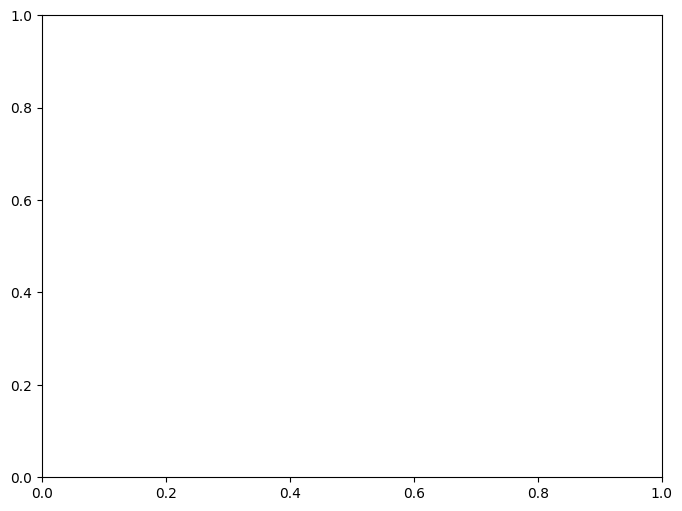

In [54]:
#Visualizing the silhouette scores in a plot
! pip install -q matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(range(2,10), metrics)
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [51]:
sc.stop()